#Data Wrangling

In [3]:
#mengimport library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import re
import time
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Memuat dataset
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [6]:
# Tampilkan beberapa baris pertama dari dataset
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
#menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
#melihat nilai null
df.isnull().sum()

Review    0
Liked     0
dtype: int64

#Eksplorasi Data

In [9]:
# membuat Diagram pie untuk menunjukkan persentase ulasan yang positif dan negatif berdasarkan kolom 'Liked' dalam dataset
Labels = pd.DataFrame(df['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked','Count']
Labels['Liked'] = Labels['Liked'].map({0: 'Negative',1: 'Positive'})

fig = px.pie(Labels, values = 'Count', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()

Diagram pie ini akan menunjukkan persentase ulasan yang positif dan negatif berdasarkan kolom 'Liked' dalam dataset. bisa dilihat bahwa persentase ulasan positif 50% dan negatif juga 50%.

In [10]:
# Menghitung jumlah ulasan positif dan negatif
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [11]:
all_reviews = " ".join(df['Review'])

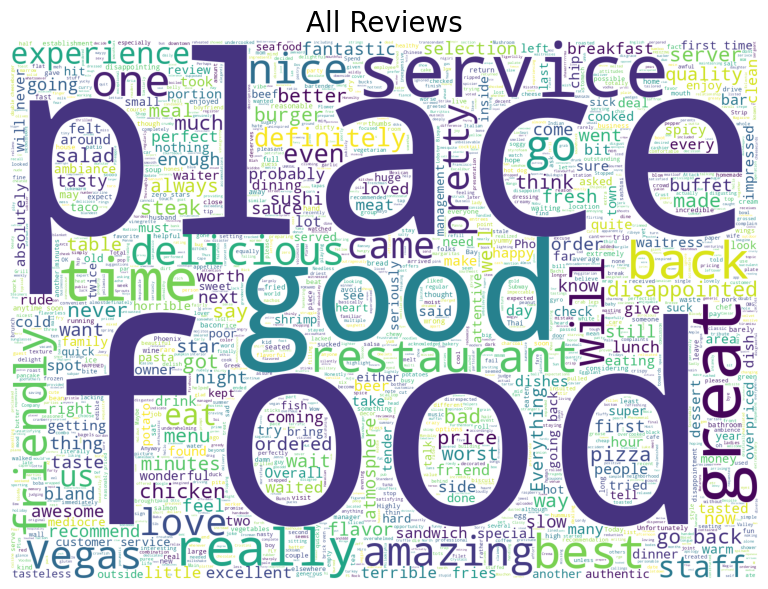

In [12]:
# Menyiapkan figur untuk plot
plt.subplots(figsize=(10,7))

# Membuat word cloud
wordcloud = WordCloud(background_color='white',max_words=10000, width=1500, height=1080, stopwords=STOPWORDS).generate(all_reviews)

# Menambahkan judul dan menampilkan word cloud
plt.title("All Reviews", fontsize=20)
plt.imshow(wordcloud.recolor(colormap='viridis'))
plt.axis('off')
plt.show()

kode ini membuat dan menampilkan word cloud dari kata-kata yang paling sering muncul dalam ulasan di dataset.

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Evaluasi Model

In [14]:
# Inisialisasi daftar kosong untuk menyimpan ulasan yang telah diproses
corpus = []

# Pra-pemrosesan teks
for i in range(0, len(df)):
    # Menghapus karakter khusus dari ulasan dan mengubah menjadi huruf kecil
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i].lower())

    # Tokenisasi kata
    review_words = review.split()

    # Menghapus stopwords dan melakukan stemming
    ps = PorterStemmer()
    review_words = [ps.stem(word) for word in review_words if not word in set(stopwords.words('english'))]

    # Menggabungkan kata-kata yang telah distem menjadi satu string ulasan
    review = ' '.join(review_words)

    # Menambahkan ulasan yang telah diproses ke dalam corpus
    corpus.append(review)

Iterasi melalui DataFrame: Kode for i in range(0, len(df)) melakukan iterasi melalui setiap baris ulasan dalam DataFrame df.

Pembersihan Teks:

review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i].lower()): Menggunakan ekspresi regular (regex) untuk menghapus semua karakter selain huruf (baik huruf besar maupun kecil) dari teks ulasan dan mengubahnya menjadi huruf kecil.
Misalnya, jika ulasan awalnya adalah "The food was great!", setelah pembersihan akan menjadi "the food was great".

Tokenisasi Kata:
review_words = review.split(): Memecah teks ulasan menjadi kata-kata individu berdasarkan spasi, sehingga setiap kata menjadi elemen dalam sebuah list.
Misalnya, "the food was great" akan menjadi ['the', 'food', 'was', 'great'].
Penghapusan Stopwords dan Stemming:

stopwords.words('english'): Menggunakan NLTK untuk mendapatkan daftar stopwords dalam bahasa Inggris.
review_words = [ps.stem(word) for word in review_words if not word in set(stopwords.words('english'))]: Melakukan stemming pada setiap kata (mengubah kata-kata menjadi bentuk dasar atau akarnya) dan menghapus kata-kata yang termasuk dalam stopwords.
Stemming dilakukan dengan menggunakan Porter Stemmer dari NLTK (ps = PorterStemmer()), yang merupakan salah satu metode untuk mengurangi kata-kata ke bentuk dasarnya.

Misalnya, kata-kata seperti "was" akan dihapus karena termasuk stopwords, dan kata-kata seperti "great" akan diubah menjadi "great".
Penggabungan dan Penyimpanan:

review = ' '.join(review_words): Menggabungkan kembali kata-kata yang telah diproses menjadi satu string ulasan yang telah bersih dari stopwords dan sudah distem.
corpus.append(review): Menambahkan ulasan yang telah diproses dan siap untuk digunakan ke dalam list corpus.

In [15]:
corpus[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [16]:
#Tujuan CountVectorizer digunakan untuk mengubah kumpulan dokumen teks menjadi representasi numerik yang dapat
#dipahami oleh model machine learning, seperti model klasifikasi atau pengelompokan.
cv = CountVectorizer(max_features=1500)

In [17]:
X = cv.fit_transform(corpus).toarray()
y = df.loc[:, 'Liked'].values

In [18]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Inisialisasi dan latih model Decision Tree Classifier
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_running_time = time.time() - start_time
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier Running Time:", dt_running_time, "seconds")
print(classification_report(y_test, dt_y_pred))

Decision Tree Classifier Accuracy: 0.715
Decision Tree Classifier Running Time: 0.6060116291046143 seconds
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        96
           1       0.76      0.66      0.71       104

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



In [26]:
# Inisialisasi dan latih model Logistic Regression
start_time = time.time()
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_running_time = time.time() - start_time
print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Running Time:", lr_running_time, "seconds")
print(classification_report(y_test, lr_y_pred))


Logistic Regression Accuracy: 0.74
Logistic Regression Running Time: 0.10323309898376465 seconds
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        96
           1       0.81      0.65      0.72       104

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [25]:
# Inisialisasi dan latih model Random Forest Classifier
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_running_time = time.time() - start_time
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Running Time:", rf_running_time, "seconds")
print(classification_report(y_test, rf_y_pred))


Random Forest Classifier Accuracy: 0.71
Random Forest Classifier Running Time: 6.771901845932007 seconds
              precision    recall  f1-score   support

           0       0.65      0.86      0.74        96
           1       0.82      0.57      0.67       104

    accuracy                           0.71       200
   macro avg       0.73      0.72      0.71       200
weighted avg       0.74      0.71      0.70       200



In [23]:
# Inisialisasi dan latih model K-Nearest Neighbors Classifier
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_running_time = time.time() - start_time
print("\nK-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classifier Running Time:", knn_running_time, "seconds")
print(classification_report(y_test, knn_y_pred))


K-Nearest Neighbors Classifier Accuracy: 0.625
K-Nearest Neighbors Classifier Running Time: 0.18222475051879883 seconds
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        96
           1       0.71      0.47      0.57       104

    accuracy                           0.62       200
   macro avg       0.65      0.63      0.62       200
weighted avg       0.65      0.62      0.62       200



#Visualisasi Data

In [144]:
# Menyimpan hasil akurasi dari masing-masing model
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
accuracies = [dt_accuracy, lr_accuracy, rf_accuracy, knn_accuracy]

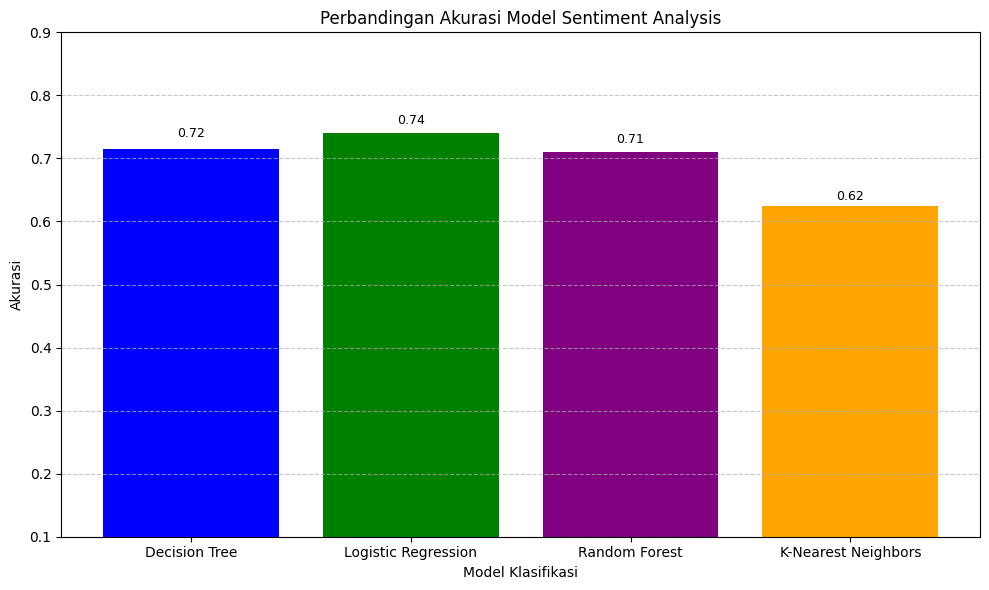

In [145]:
# Membuat diagram batang untuk membandingkan akurasi model
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'orange'])

# Menambahkan label akurasi di atas setiap bar
for bar, acc in zip(bars, accuracies):
    yval = round(acc, 2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, yval, ha='center', va='bottom', fontsize=9)

plt.title('Perbandingan Akurasi Model Sentiment Analysis')
plt.xlabel('Model Klasifikasi')
plt.ylabel('Akurasi')
plt.ylim(0.1, 0.9)  # Menetapkan rentang sumbu y agar lebih mudah dibandingkan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()